# Description

## Context
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

<img src="https://i.imgur.com/jZqpV51.png">

Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

## Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# Mount drive and imports

In [0]:
# on google colab only

import os
from google.colab import drive

drive.mount("/drive")
os.chdir("/drive/My Drive/Projects/Pneumonia detection")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Functions

In [0]:
def show_images_grid(w, h, *images, **fig_kwargs):
  fig = plt.figure(**fig_kwargs)
  cont = 1
  
  for image in images:
    fig.add_subplot(w, h, cont).imshow(image, cmap='gray')
    
    cont+=1

def dataset_to_array(dataset):
  dataset = np.array([np.array(img.convert("L")).astype("uint8") for img in dataset]).astype("uint8")

  return dataset

def reshape_dataset(dataset, new_resolution):
  new_dataset = []
  for img in dataset:
    new_img = img.resize(new_resolution, Image.ANTIALIAS)
    new_dataset.append(new_img)
  
  return new_dataset

# Download data

In [0]:
!pip install --user kaggle

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 78.7MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.5MB/s]


In [0]:
import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall("dataset/")

# Load data

In [0]:
def load_normal_dataset(path):
  images = []
  for file in os.listdir(path):
    if file.endswith(".jpeg"):
      img = Image.open(os.path.join(path, file))
      images.append(img)
  
  return images

def load_pneumonia_dataset(path):
  images_virus, images_bacteria = [], []
  for file in os.listdir(path):
    if file.endswith(".jpeg"):
      img = Image.open(os.path.join(path, file))
      if "virus" in file:
        images_virus.append(img)
      elif "bacteria" in file:
        images_bacteria.append(img)
      else:
        print(f"image {file} não catalogada")
  return images_virus, images_bacteria

dataset_train_normal = load_normal_dataset("dataset/chest_xray/train/NORMAL")
dataset_train_pneumonia_virus, dataset_train_pneumonia_bacteria = load_pneumonia_dataset("dataset/chest_xray/train/PNEUMONIA")

dataset_test_normal = load_normal_dataset("dataset/chest_xray/test/NORMAL")
dataset_test_pneumonia_virus, dataset_test_pneumonia_bacteria = load_pneumonia_dataset("dataset/chest_xray/test/PNEUMONIA")

# Pre-processing

In [0]:
# reshape train images

dataset_train_normal_512x512 = reshape_dataset(dataset_train_normal, (512, 512))
dataset_train_pneumonia_virus_512x512 = reshape_dataset(dataset_train_pneumonia_virus, (512, 512))
dataset_train_pneumonia_bacteria_512x512 = reshape_dataset(dataset_train_pneumonia_bacteria, (512, 512))

In [0]:
# reshape test images

dataset_test_normal_512x512 = reshape_dataset(dataset_test_normal, (512, 512))
dataset_test_pneumonia_virus_512x512 = reshape_dataset(dataset_test_pneumonia_virus, (512, 512))
dataset_test_pneumonia_bacteria_512x512 = reshape_dataset(dataset_test_pneumonia_bacteria, (512, 512))

In [0]:
# save train pre-processing imgs

dataset_train_normal_512x512 = dataset_to_array(dataset_train_normal_512x512)
np.save("dataset/dataset_train_normal_512x512.npy", dataset_train_normal_512x512)
dataset_train_pneumonia_virus_512x512 = dataset_to_array(dataset_train_pneumonia_virus_512x512)
np.save("dataset/dataset_train_pneumonia_virus_512x512.npy", dataset_train_pneumonia_virus_512x512)
dataset_train_pneumonia_bacteria_512x512 = dataset_to_array(dataset_train_pneumonia_bacteria_512x512)
np.save("dataset/dataset_train_pneumonia_bacteria_512x512.npy", dataset_train_pneumonia_bacteria_512x512)

In [0]:
# save test pre-processing imgs

dataset_test_normal_512x512 = dataset_to_array(dataset_test_normal_512x512)
np.save("dataset/dataset_test_normal_512x512.npy", dataset_test_normal_512x512)
dataset_test_pneumonia_virus_512x512 = dataset_to_array(dataset_test_pneumonia_virus_512x512)
np.save("dataset/dataset_test_pneumonia_virus_512x512.npy", dataset_test_pneumonia_virus_512x512)
dataset_test_pneumonia_bacteria_512x512 = dataset_to_array(dataset_test_pneumonia_bacteria_512x512)
np.save("dataset/dataset_test_pneumonia_bacteria_512x512.npy", dataset_test_pneumonia_bacteria_512x512)

# Load pre-processed images

In [0]:
dataset_train_normal_512x512 = np.load("dataset/dataset_train_normal_512x512.npy")
dataset_train_pneumonia_virus_512x512 = np.load("dataset/dataset_train_pneumonia_virus_512x512.npy")
dataset_train_pneumonia_bacteria_512x512 = np.load("dataset/dataset_train_pneumonia_bacteria_512x512.npy")

dataset_test_normal_512x512 = np.load("dataset/dataset_test_normal_512x512.npy")
dataset_test_pneumonia_virus_512x512 = np.load("dataset/dataset_test_pneumonia_virus_512x512.npy")
dataset_test_pneumonia_bacteria_512x512 = np.load("dataset/dataset_test_pneumonia_bacteria_512x512.npy")

# Show imgs

## Normal Images

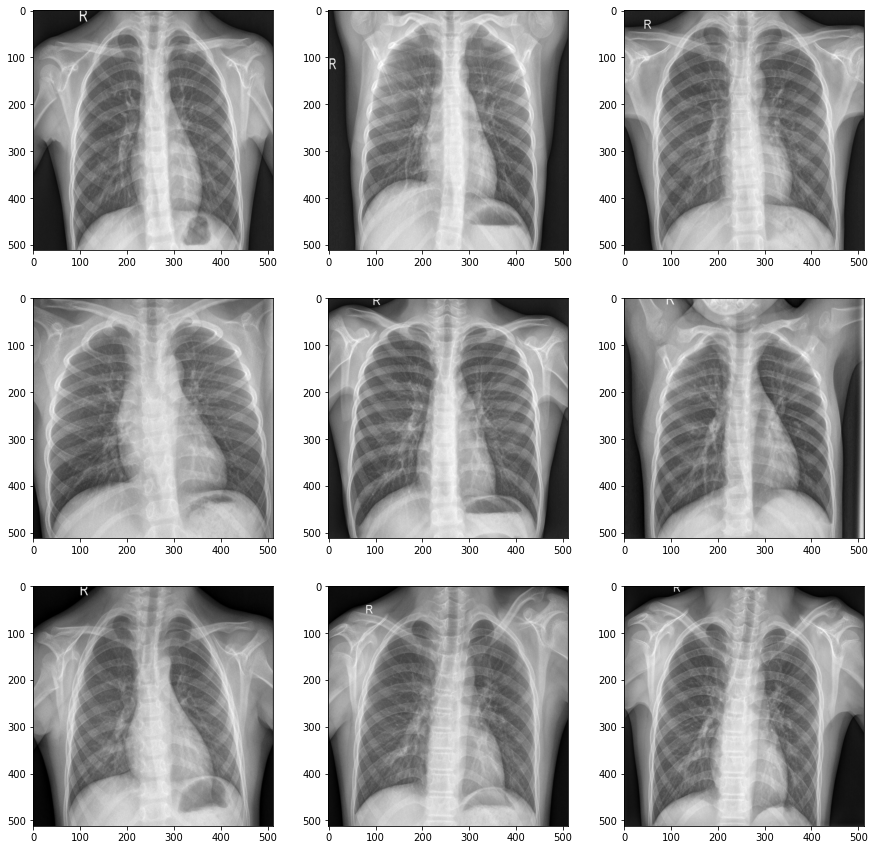

In [0]:
show_images_grid(3, 3, *dataset_test_normal_512x512[:9], figsize = (15, 15))

## Pneumonia images

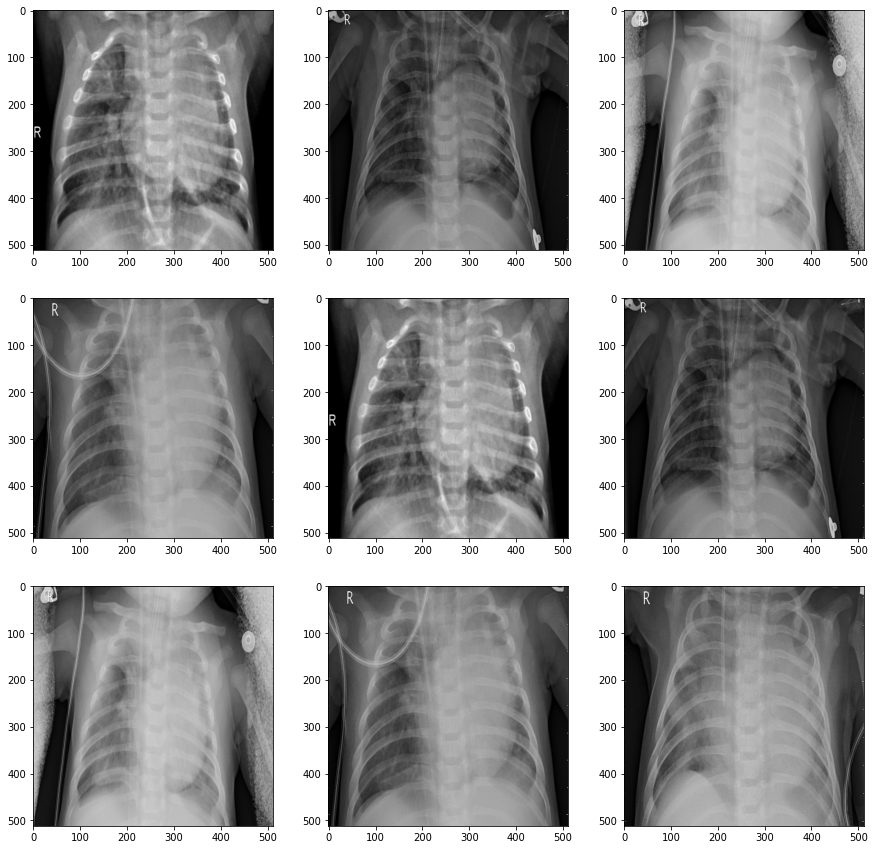

In [0]:
data = dataset_test_pneumonia_bacteria_512x512[:4].tolist() + dataset_test_pneumonia_bacteria_512x512[:5].tolist()
show_images_grid(3, 3, *data, figsize = (15, 15))

## Histogram of images

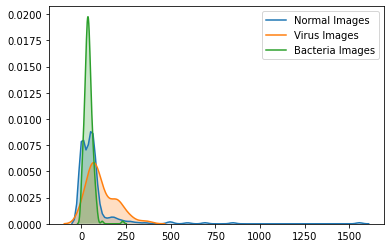

In [0]:
sum_test_imgs_normal = np.array([(img//255).sum() for img in dataset_test_normal_512x512])
sum_test_imgs_virus = np.array([(img//255).sum() for img in dataset_test_pneumonia_virus_512x512])
sum_test_imgs_bacteria = np.array([(img//255).sum() for img in dataset_test_pneumonia_bacteria_512x512])

sns.kdeplot(sum_test_imgs_normal, shade=True, label = "Normal Images")
sns.kdeplot(sum_test_imgs_virus, shade=True, label = "Virus Images")
sns.kdeplot(sum_test_imgs_bacteria, shade=True, label = "Bacteria Images")

# Histogram of colors

In [0]:
imgs_pixels_normal = dataset_train_normal_512x512[:100].ravel()
imgs_pixels_virus = dataset_train_pneumonia_virus_512x512[:100].ravel()
imgs_pixels_bacteria = dataset_train_pneumonia_bacteria_512x512[:100].ravel()

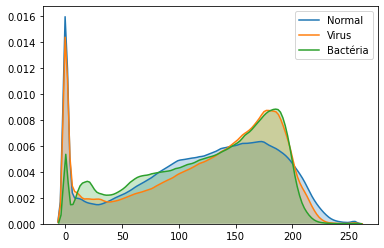

In [0]:
sns.kdeplot(imgs_pixels_normal, shade=True, label = "Normal")
sns.kdeplot(imgs_pixels_virus, shade=True, label = "Virus")
sns.kdeplot(imgs_pixels_bacteria, shade=True, label = "Bactéria")